In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, burr, chi, gamma
import pickle

import sys
sys.path += ['utils/']  

from EDRep import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
def Normal(μ, σ2, t):
    
    return 1/np.sqrt(2*np.pi*σ2)*np.exp(-(t - μ)**2/(2*σ2))

In [3]:
# all_f = ['youtube', 0, 7, 9, 224]
# kv = [1, 2, 3, 4, 5, 6, 7, 8]

# Xv, Zv = [], []
# res = [[] for i in range(len(all_f))]

# for i, f in enumerate(all_f):

#     print('I am reading f: ' + str(f))
#     X = pd.read_csv('embeddings/' + str(f) + '.txt', skiprows = 1, on_bad_lines='skip', 
#                     sep = ' ', header = None, encoding='latin-1')
#     X.set_index(0, inplace = True)
#     X = X.dropna(axis = 1)
#     X = X.values

#     n, dim = np.shape(X)
#     print(n, dim)

#     X = normalize(X, norm = 'l2', axis = 1)
#     Xv.append(X)

#     indeces = np.random.choice(np.arange(n), 1000, replace = False)
    
#     print('I am computing the Z values')
    
    
#     Zv.append(computeZ(X, indeces))
    
#     res[i] = [computeZest(X, indeces, k = k) for k in kv]   
#     print('-------------------------\n')
    
# # save
# with open('saved_files/test_approx.pkl', 'wb') as file:       
#     pickle.dump([Zv, Xv, res], file) 

I am reading f: youtube
64503 127
I am computing the Z values
-------------------------

I am reading f: 0
163473 300
I am computing the Z values
-------------------------

I am reading f: 7
273930 300
I am computing the Z values
-------------------------

I am reading f: 9
273930 300
I am computing the Z values
-------------------------

I am reading f: 224
99884 200
I am computing the Z values
-------------------------



In [6]:
# load
with open('saved_files/test_approx.pkl', 'rb') as file: 
    Zv, Xv, resv = pickle.load(file) 

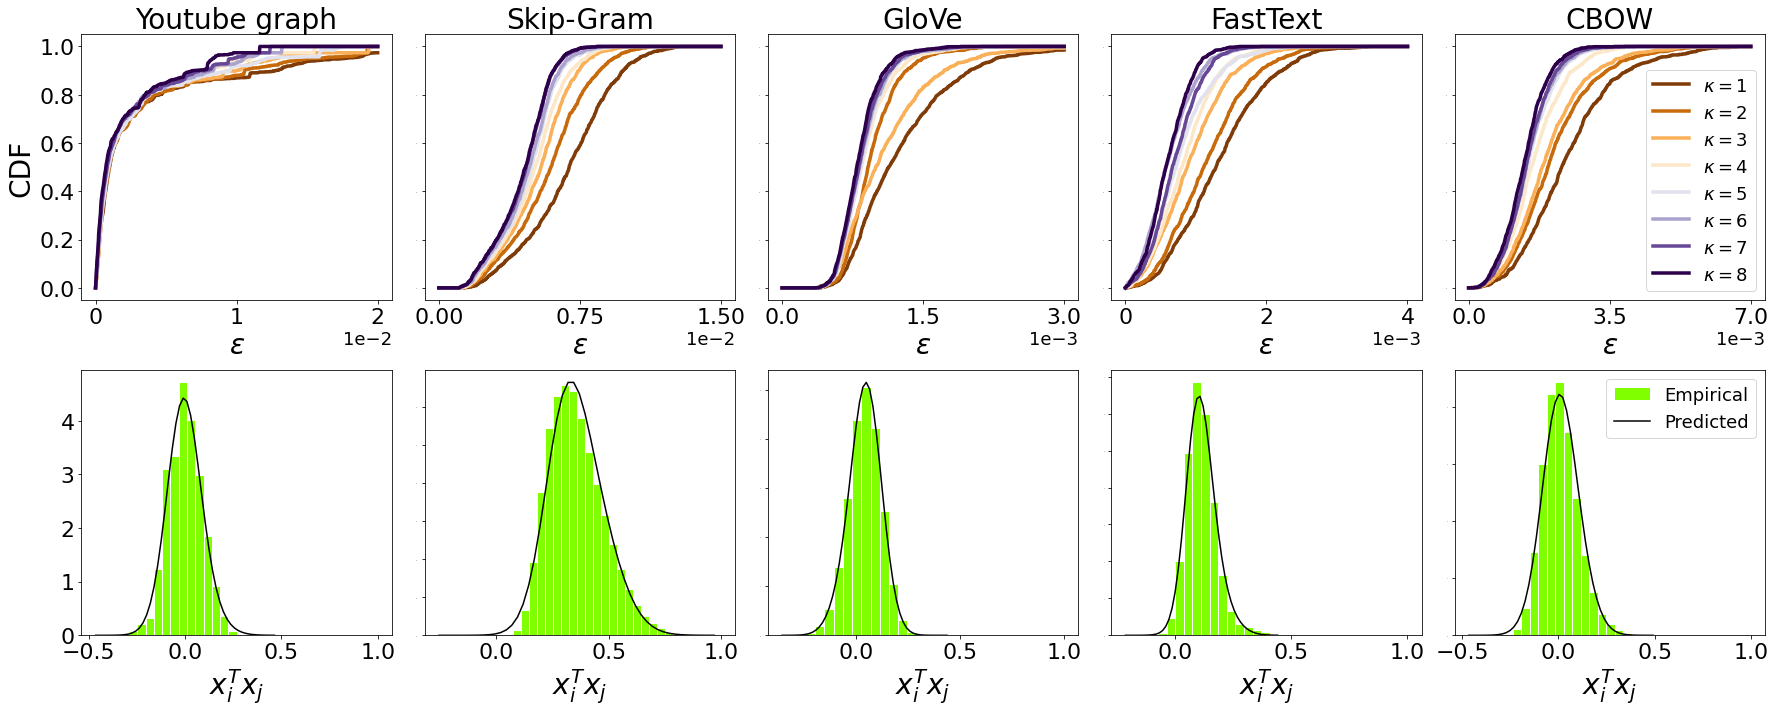

In [12]:
fs = 22
ffs = 18
Fs = 28

kv = [1, 2, 3, 4, 5, 6, 7, 8]
maxt = [0.02, 0.015, 0.003, 0.004, 0.007]
titles = ['Youtube graph', 'Skip-Gram', 'GloVe', 'FastText', 'CBOW']
A = 2
B = len(titles)
cmap = plt.cm.get_cmap('PuOr', len(kv))

fig, ax = plt.subplots(A, B, figsize = (5*B, 5*A))
fig.subplots_adjust(hspace = .3)

for b, (X, Z, res) in enumerate(zip(Xv, Zv, resv)):

    tv = np.linspace(0, maxt[b], 1000)
    for j in range(len(kv)):
        ϵ = np.abs(Z - res[j].Zest)/Z
        ax[0,b].plot(tv, [np.mean(ϵ < t) for t in tv], color = cmap(j), 
                       label = r'$\kappa =$' + str(kv[j]), linewidth = 3.5)

        ax[0,b].set_xticks(np.linspace(0, max(tv), 3))
        ax[0,b].tick_params(axis = 'x', labelsize = fs)
        if b == 0:
            ax[0,b].tick_params(axis = 'y', labelsize = fs)
        else:
            ax[0,b].tick_params(axis = 'y', labelsize = 0)

        ax[0,b].set_xlabel(r'$\epsilon$', fontsize = Fs)
        ax[0,b].set_title(titles[b], fontsize = Fs)
        ax[0,b].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        ax[0,b].xaxis.get_offset_text().set_fontsize(18)

    n, dim = np.shape(X)   
    α = np.random.randint(n)

    ax[1, b].hist(X[α]@X.T, bins = 30, edgecolor = 'white', color = 'chartreuse', 
                  density = True, label = 'Empirical')

    m = np.mean(X[α]@X.T) 
    s = np.sqrt(np.var(X[α]@X.T))
    t = np.linspace(m - 5*s, m + 5*s)
    k = 4
    π, μ, σ2 = res[k].π, res[k].μ, res[k].Ω

    y = np.sum(np.diag(π/n)@np.array([Normal(X[α]@μ[b].T, X[α]@σ2[b]@X[α], t) for b in range(len(μ))]), axis = 0)
    ax[1, b].plot(t, y, color = 'k', label = 'Predicted')

    ax[1,b].tick_params(axis = 'both', labelsize = fs)
    ax[1,b].set_xlabel(r'$x_i^Tx_j$', fontsize = Fs)
    if b == 0:
        ax[1,b].tick_params(axis = 'y', labelsize = fs)
    else:
        ax[1,b].tick_params(axis = 'y', labelsize = 0)

ax[0,-1].legend(fontsize = ffs)
ax[0,0].set_ylabel('CDF', fontsize = Fs)      

# ax[1,-1].legend(bbox_to_anchor=(1., .7), fontsize = ffs)
ax[1,-1].legend(fontsize = ffs)

   
plt.tight_layout() 
plt.savefig('../../paper/v2/paper/Figures/test_full.pdf', dpi = 400)
plt.show();